In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

from utils.time_utils import TimeProcessorSDPA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_sdpa = TimeProcessorSDPA(base_dir, is_forward=False)
df = time_processor_sdpa.get_data(sample_rate=0.7)

In [3]:
df

,kernel_params,dtype,backend,b,h,s_q,s_kv,d_qk,d_v,is_causal,time,gflops
0,b16.flash.64.4.4.1024.48.48.0,b16,flash,64,4,4,1024,48,48,0,0.246784,0.201327
1,b16.flash.64.4.32.1024.112.112.0,b16,flash,64,4,32,1024,112,112,0,0.298496,3.758096
2,b16.flash.64.4.32.128.112.112.0,b16,flash,64,4,32,128,112,112,0,0.130048,0.469762
3,b16.flash.4.4.1024.512.192.192.0,b16,flash,4,4,1024,512,192,192,0,0.252928,6.442451
4,b16.flash.8.4.1024.256.80.80.0,b16,flash,8,4,1024,256,80,80,0,0.160768,2.684355
...,...,...,...,...,...,...,...,...,...,...,...,...
99723,32.efficient.16.16.128.512.128.32.1,32,efficient,16,16,128,512,128,32,1,0.538624,5.368709
99724,32.efficient.2.16.64.128.64.128.1,32,efficient,2,16,64,128,64,128,1,0.142336,0.100663
99725,32.efficient.2.16.64.32.128.128.0,32,efficient,2,16,64,32,128,128,0,0.138240,0.033554
99726,32.efficient.32.16.32.32.64.128.0,32,efficient,32,16,32,32,64,128,0,0.218112,0.201327


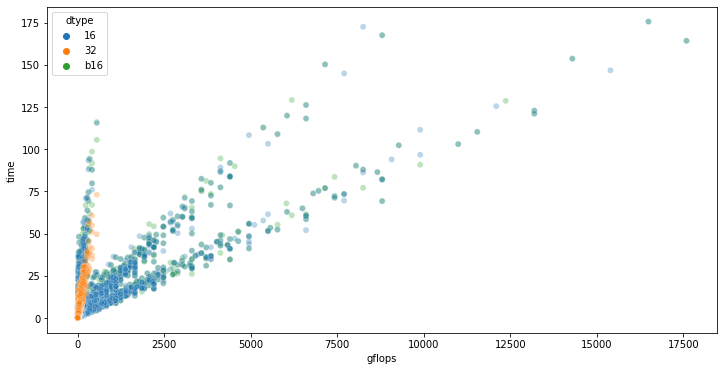

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df)
plt.show()

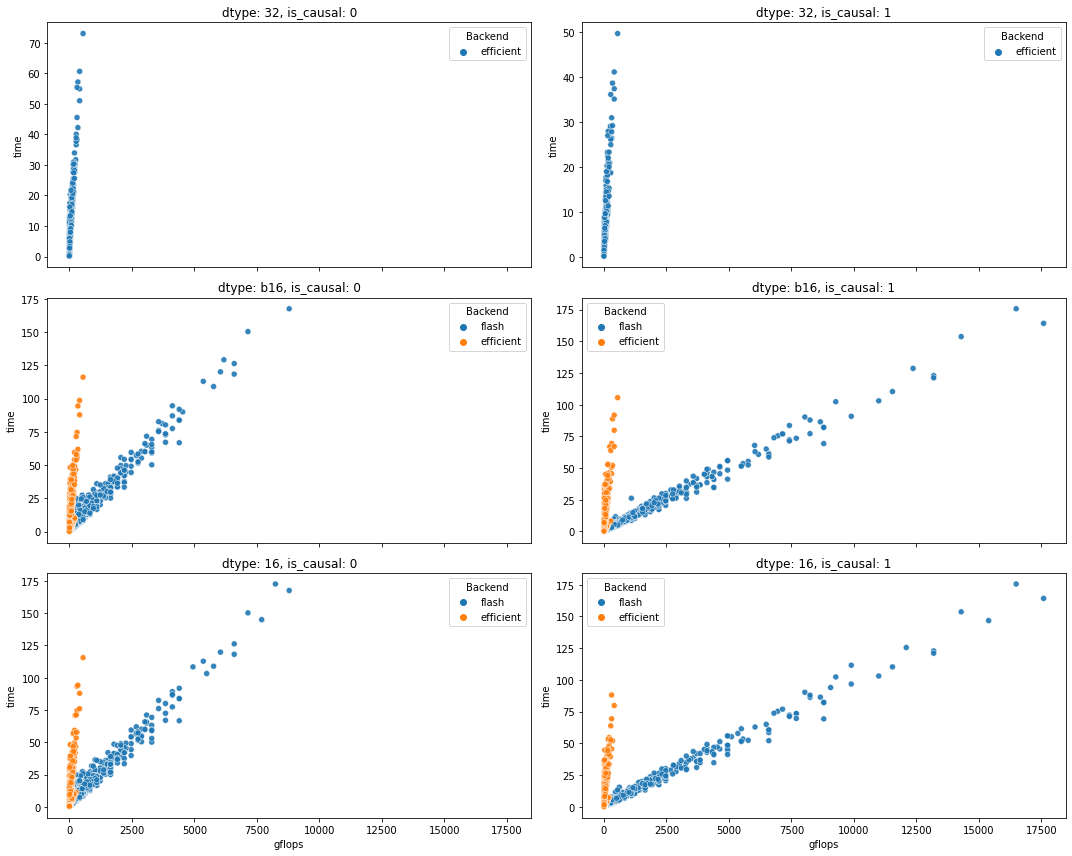

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=False)
axes = axes.flatten()

for idx, (dtype, is_causal) in enumerate([(dtype, is_causal) for dtype in ["32", "b16", "16"] for is_causal in [0, 1]]):
    ax = axes[idx]
    sns.scatterplot(
        x="gflops", y="time", hue="backend", alpha=0.9, data=df.query(f"dtype == '{dtype}' and is_causal == '{is_causal}'"), ax=ax
    )
    ax.set_title(f"dtype: {dtype}, is_causal: {is_causal}")
    ax.legend(title="Backend", loc='best')

plt.tight_layout()
plt.show()